# 筋トレの画像認識モデルを作成する

## 画像の読み込み

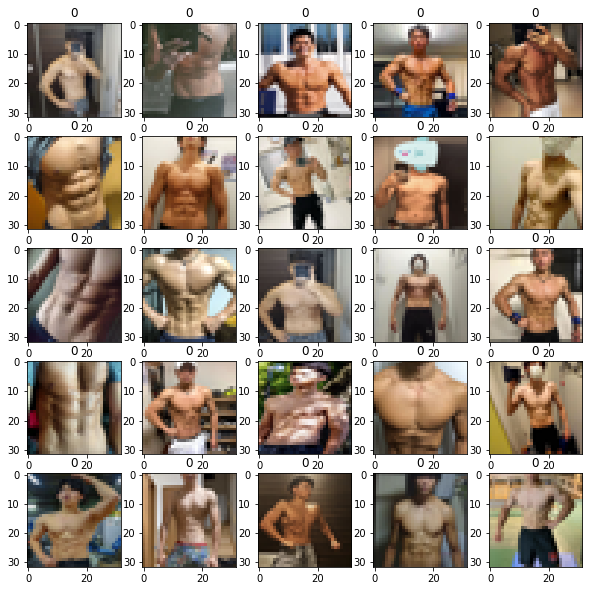

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#写真データを読み込み
photo = np.load("image/photos.npz") #相対パスで指定
x = photo['x']
y = photo['y']
#開始インデックス
idx = 0
#pyplotで出力
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])
plt.show()

In [50]:
!python read_image.py

保存しました:image/photos.npz 184


## モデルにデータを学習させる

In [140]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力を指定 --- (*1)
im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 4

# 写真データを読み込み --- (*2)
photos = np.load('image/photos.npz')#allow_pickle=True
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7,shuffle=True)

#学習用データを水増しする
x_new = []
y_new = []
for i,xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30,30,5):
        #回転させる
        center = (16,16) #回転の中心点
        mtx = cv2.getRotationMatrix2D(center,ang,1.0)
        xi2 = cv2.warpAffine(xi,mtx,(32,32))
        x_new.append(xi2)
        y_new.append(yi)
        #さらに左右反転させる
        xi3 = cv2.flip(xi2,1)
        x_new.append(xi3)
        y_new.append(yi)

#水増しさせたデータを学習用に置き換える
print('水増し前:',len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後:',len(y_train))

    

# CNNモデルを取得 --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')

ValueError: Found input variables with inconsistent numbers of samples: [46, 184]

In [37]:
!python read_image.py

保存しました:image/photos.npz 184


In [43]:
cd ..

/Users/higuchidaisuke/Desktop/make_muscle_application


## 精度の確認

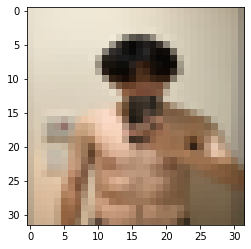

[4.6137572e-20 1.0000000e+00 3.2709167e-22 7.0910704e-21]
この写真は、 標準型 です。
可能性は、 100 %
この体の点数は: 70.0


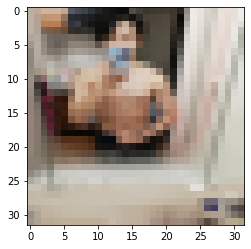

[1.0000000e+00 2.4952445e-15 8.1411917e-20 2.1306362e-14]
この写真は、 筋肉型 です。
可能性は、 100 %
この体の点数は: 90.00000000000102


In [55]:
import cnn_model
import keras 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

target_image = "tast-yase.jpg"

im_rows = 32
im_cols = 32
im_color = 3
in_shape = (im_rows,im_cols,im_color)

LABELS = ["筋肉型","標準型","痩せ型","肥満型"]

#保存した CNNモデルを読み込む
model = cnn_model.get_model(in_shape,nb_classes)
model.load_weights("./image/photos-model-light.hdf5")

def check_photo(path):
    #画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB")
    img = img.resize((im_cols,im_rows))
    plt.imshow(img)
    plt.show()
    #データに変換
    x = np.asarray(img)
    x = x.reshape(-1,im_rows,im_cols,im_color)
    x = x / 255
    
    #予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx]*100)
    return (pre,idx,per,)

def check_photo_str(path):
    pre,idx,per = check_photo(path)
    #答えを表示
    print(pre)
    print("この写真は、",LABELS[idx],"です。")
    print("可能性は、",per,"%")
    print("この体の点数は:",90*pre[0]+70*pre[1]+40*pre[2]+40*pre[3])
    
if __name__ == "__main__":
    check_photo_str("test/test-normal1.jpg")
    check_photo_str("test/test-normal2.jpg")

In [ ]:
inputs = []
images = []
img_path = './pics/fish-bike.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())


In [ ]:
import os
input_data_path = './pics/'
inputs = []
images = []

file_list = os.listdir(input_data_path)
for file_name in file_list:
    img_path = input_data_path + file_name
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img)
    images.append(imread(img_path))
    inputs.append(img.copy())

inputs = preprocess_input(np.array(inputs))

In [187]:
!pwd

/Users/higuchidaisuke/Desktop/make_muscle_application


In [67]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('test/test.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='detaup', save_prefix='test', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

## データの水増し

### 画像の色彩調整を行い、データの水増し

In [165]:
def color_change(path):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    print(len(files))
    for idx,file in enumerate(files):
        img = cv2.imread(file)  # 画像の読み出し
        img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)  # 色空間をBGRからHSVに変換
        s_magnification = 1  # 彩度(Saturation)の倍率
        v_magnification = 0.7  # 明度(Value)の倍率

        img_hsv[:,:,(1)] = img_hsv[:,:,(1)]*s_magnification  # 彩度の計算
        img_hsv[:,:,(2)] = img_hsv[:,:,(2)]*v_magnification  # 明度の計算
        img_bgr = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)  # 色空間をHSVからBGRに変換
        cv2.imwrite(path+"/"+str(str(idx).zfill(2))+".jpg",img_bgr)  # 画像の保存

In [188]:
#color_change("image/muscle1")
#color_change("image/normal1")
color_change("image/yase1")
#color_change("image/fat1")

20


In [193]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import glob
import numpy as np
from PIL import Image
import os,random,glob
import cv2
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

def data_padding(path,dirname):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    print(len(files))
    for file in files:
        img = load_img(file)  # this is a PIL image
        x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
        x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

        # the .flow() command below generates batches of randomly transformed images
        # and saves the results to the `preview/` directory
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=path+"_new", save_format='jpg'):
            i += 1
            if i > 15:
                break  # otherwise the generator would loop indefinitely

In [177]:
pwd

'/Users/higuchidaisuke/Desktop/make_muscle_application'

In [173]:
!mkdir fat_new

In [203]:
files=glob.glob("image/yase_new"+"/*.jpg")
print(len(files))

625


In [194]:
data_padding("./image/muscle","muscle")
data_padding("./image/normal","normal")
#data_padding("image/yase1")
data_padding("./image/fat","fat")

55
65
49


### 顔の画像にモザイクをつける

In [195]:
import cv2

face_cascade_path = "/Users/higuchidaisuke/Downloads/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(face_cascade_path)


def mosaic(path):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    for file in files:
        src = cv2.imread(file)
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(src_gray)
        ratio = 0.05
        if not len(faces)==0:
            for x, y, w, h in faces:
                small = cv2.resize(src[y: y + h, x: x + w], None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
                src[y: y + h, x: x + w] = cv2.resize(small, (w, h), interpolation=cv2.INTER_NEAREST)
                cv2.imwrite(file, src)


In [197]:
#mosaic("image/muscle_new")
mosaic("image/normal_new")
mosaic("image/yase_new")
mosaic("image/fat_new")

## 学習させる

In [204]:
!python read_image_new.py

保存しました:image/photos_new.npz 2000


Train on 1400 samples, validate on 600 samples
Epoch 1/10
1400/1400 [==============================] - 13s 9ms/step - loss: 1.4993 - accuracy: 0.2743 - val_loss: 1.3873 - val_accuracy: 0.2517
Epoch 2/10
1400/1400 [==============================] - 12s 9ms/step - loss: 1.3318 - accuracy: 0.3550 - val_loss: 1.2710 - val_accuracy: 0.4150
Epoch 3/10
1400/1400 [==============================] - 12s 8ms/step - loss: 1.2505 - accuracy: 0.4179 - val_loss: 1.1518 - val_accuracy: 0.4550
Epoch 4/10
1400/1400 [==============================] - 12s 8ms/step - loss: 1.1816 - accuracy: 0.4893 - val_loss: 1.1969 - val_accuracy: 0.4467
Epoch 5/10
1400/1400 [==============================] - 11s 8ms/step - loss: 1.0808 - accuracy: 0.5471 - val_loss: 1.0532 - val_accuracy: 0.5517
Epoch 6/10
1400/1400 [==============================] - 12s 8ms/step - loss: 0.9720 - accuracy: 0.6064 - val_loss: 1.0709 - val_accuracy: 0.5283
Epoch 7/10
1400/1400 [==============================] - 12s 8ms/step - loss: 0.8704

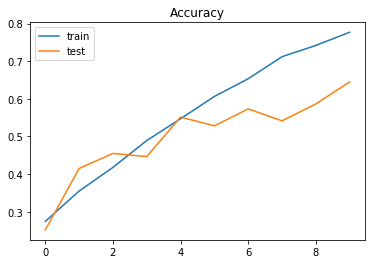

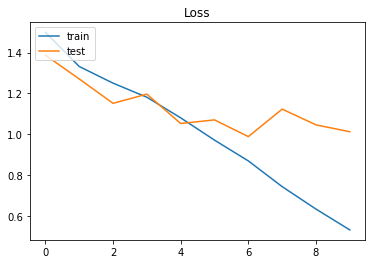

In [205]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True)
all_loss=[]
all_val_loss=[]
all_acc=[]
all_val_acc=[]
ep=300

# 入力と出力を指定 --- (*1)
im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 4

# 写真データを読み込み --- (*2)
photos = np.load('image/photos_new.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7,shuffle=True)
'''
#学習用データを水増しする
x_new = []
y_new = []
for i,xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30,30,5):
        #回転させる
        center = (16,16) #回転の中心点
        mtx = cv2.getRotationMatrix2D(center,ang,1.0)
        xi2 = cv2.warpAffine(xi,mtx,(32,32))
        x_new.append(xi2)
        y_new.append(yi)
        #さらに左右反転させる
        xi3 = cv2.flip(xi2,1)
        x_new.append(xi3)
        y_new.append(yi)


#水増しさせたデータを学習用に置き換える
print('水増し前:',len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後:',len(y_train))
'''
    

# CNNモデルを取得 --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light_new.hdf5')

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True)
all_loss=[]
all_val_loss=[]
all_acc=[]
all_val_acc=[]
ep=300
for train_index, val_index in kf.split(X_train,Y_train):

    train_data=X_train[train_index]
    train_label=Y_train[train_index]
    val_data=X_train[val_index]
    val_label=Y_train[val_index]

    model=build_model()
    history=model.fit(train_data,
                      train_label,
                      epochs=ep,
                      batch_size=8,
                      validation_data=(val_data,val_label))

    loss=history.history['loss']
    val_loss=history.history['val_loss']
    acc=history.history['acc']
    val_acc=history.history['val_acc']

    all_loss.append(loss)
    all_val_loss.append(val_loss)
    all_acc.append(acc)
    all_val_acc.append(val_acc)


ave_all_loss=[
    np.mean([x[i] for x in all_loss]) for i in range(ep)]
ave_all_val_loss=[
    np.mean([x[i] for x in all_val_loss]) for i in range(ep)]
ave_all_acc=[
    np.mean([x[i] for x in all_acc]) for i in range(ep)]
ave_all_val_acc=[
    np.mean([x[i] for x in all_val_acc]) for i in range(ep)]

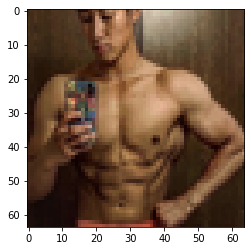

[3.5493639e-01 6.4391524e-01 1.4693387e-04 1.0013949e-03]
この写真は、 標準型 です。
可能性は、 64 %
この体の点数は: 78.83895682811271


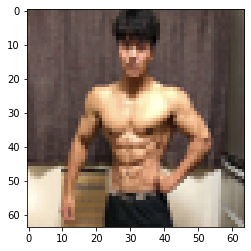

[0.46682906 0.4163118  0.00971764 0.10714152]
この写真は、 筋肉型 です。
可能性は、 46 %
この体の点数は: 78.16495310515165


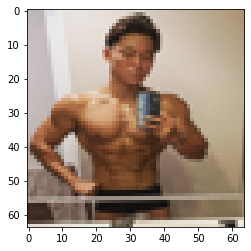

[9.9740285e-01 1.0599345e-03 7.4660103e-04 7.9057721e-04]
この写真は、 筋肉型 です。
可能性は、 99 %
この体の点数は: 94.88895299145952


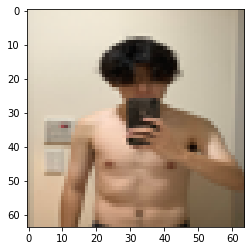

[0.7173093  0.25010583 0.00325314 0.0293317 ]
この写真は、 筋肉型 です。
可能性は、 71 %
この体の点数は: 86.9551844522357


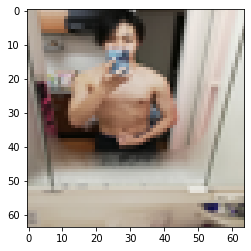

[0.3729483  0.0852733  0.20119628 0.34058213]
この写真は、 筋肉型 です。
可能性は、 37 %
この体の点数は: 63.07035528123379


In [209]:
import cnn_model
import keras 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

target_image = "tast-yase.jpg"

im_rows = 64
im_cols = 64
im_color = 3
in_shape = (im_rows,im_cols,im_color)

LABELS = ["筋肉型","標準型","痩せ型","肥満型"]

#保存した CNNモデルを読み込む
model = cnn_model.get_model(in_shape,nb_classes)
model.load_weights("./image/photos-model-light_new.hdf5")

def check_photo(path):
    #画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB")
    img = img.resize((im_cols,im_rows))
    plt.imshow(img)
    plt.show()
    #データに変換
    x = np.asarray(img)
    x = x.reshape(-1,im_rows,im_cols,im_color)
    x = x / 255
    
    #予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx]*100)
    return (pre,idx,per,)

def check_photo_str(path):
    pre,idx,per = check_photo(path)
    #答えを表示
    print(pre)
    print("この写真は、",LABELS[idx],"です。")
    print("可能性は、",per,"%")
    print("この体の点数は:",95*pre[0]+70*pre[1]+40*pre[2]+40*pre[3])
    
if __name__ == "__main__":
    check_photo_str("test/test-muscle.jpg")
    check_photo_str("test/test-muscle2.jpg")
    check_photo_str("test/test-muscle3.jpg")
    check_photo_str("test/test-normal1.jpg")
    check_photo_str("test/test-normal2.jpg")
    

# 新しいモデルの構築

In [1]:
#image_newにある画像をnpzファイルにまとめる
!python read_image_new.py

保存しました:image/photos_new.npz 147


## 画像の加工

<function matplotlib.pyplot.show(*args, **kw)>

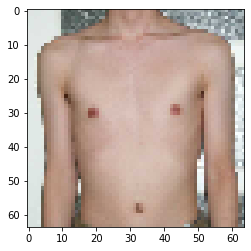

In [13]:
#64*64ピクセルの画像の解像度の確認
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("yase12.jpg")
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
img = cv2.resize(img,(64,64))
plt.imshow(img)
plt.show

### 色の転換(閾値を利用して、画像を加工)

<function matplotlib.pyplot.show(*args, **kw)>

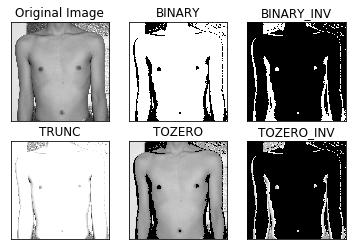

In [22]:
#単純な閾値の処理
img = cv2.imread("yase12.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

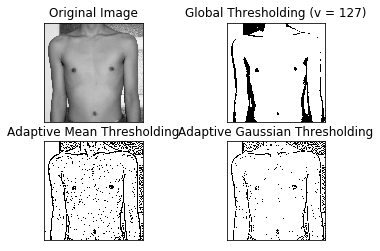

In [28]:
#適応的閾値処理
img = cv2.imread('yase12.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


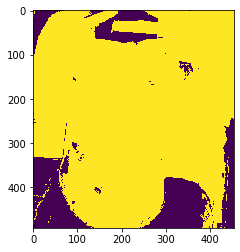

In [44]:
# define parameter
HSV_MIN = np.array([0, 30, 60])
HSV_MAX = np.array([20, 150, 255])
 
# read input image
img = cv2.imread("image_new/normal_ver1/c39f8aead6ae9b9ef9264247654fc6c1e_52494738_200905_52.jpg")
 
#convert hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
 
#mask hsv region
mask_hsv = cv2.inRange(img_hsv, HSV_MIN, HSV_MAX)
plt.imshow(mask_hsv)
plt.show()
 
# save image
#cv2.imwrite("mask_hsv.jpg", mask_hsv)


### コントラスト調整

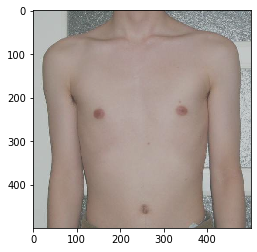

In [69]:
# ルックアップテーブルの生成
min_table = 50
max_table = 205
diff_table = max_table - min_table

LUT_HC = np.arange(256, dtype = 'uint8' )
LUT_LC = np.arange(256, dtype = 'uint8' )

# ハイコントラストLUT作成
for i in range(0, min_table):
    LUT_HC[i] = 0
for i in range(min_table, max_table):
    LUT_HC[i] = 255 * (i - min_table) / diff_table
for i in range(max_table, 255):
    LUT_HC[i] = 255

# ローコントラストLUT作成
for i in range(256):x
    LUT_LC[i] = min_table + i * (diff_table) / 255
# 変換
src = cv2.imread("yase12.jpg", 1)
high_cont_img = cv2.LUT(src, LUT_HC)
low_cont_img = cv2.LUT(src, LUT_LC)
#high_cont_img=cv2.cvtColor(high_cont_img,cv2.COLOR_BGR2RGB)
#plt.imshow(high_cont_img)
low_cont_img=cv2.cvtColor(low_cont_img,cv2.COLOR_BGR2RGB)
plt.imshow(low_cont_img)
plt.show()

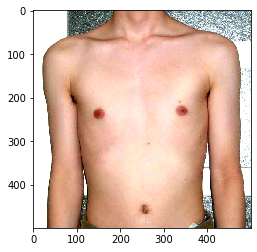

In [71]:
high_cont_img=cv2.cvtColor(high_cont_img,cv2.COLOR_BGR2RGB)
plt.imshow(high_cont_img)

In [56]:
# 画像を読み込む。
img = cv2.imread("yase.jpg",0)

# コントラストを上げる折れ線型トーンカーブ
t = 155
x = np.arange(256)
y = np.clip(255 / t * x, 0, 255)

# 変換する。
dst = cv2.LUT(img, y)
plot_grayscale_conversion(img, dst)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/matrix.cpp:406: error: (-215:Assertion failed) m.dims >= 2 in function 'Mat'


### ガンマ変換

### 平滑化

### ガウス分布に基づくノイズ

### 反転

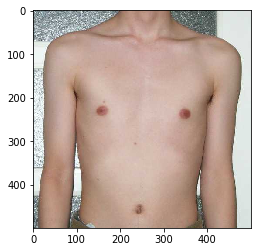

In [76]:
src = cv2.imread("yase12.jpg", 1)
hflip_img = cv2.flip(src, 1)
hflip_img = cv2.cvtColor(hflip_img,cv2.COLOR_RGB2BGR)
plt.imshow(hflip_img)

### 画像のトリミング

In [125]:
# 余白を削除する関数
def crop(image): #引数は画像の相対パス
    # 画像の読み込み
    img = cv2.imread(image)

    # 周りの部分は強制的にトリミング
    h, w = img.shape[:2]
    h1, h2 = int(h * 0.05), int(h * 0.95)
    w1, w2 = int(w * 0.05), int(w * 0.95)
    img = img[h1: h2, w1: w2]
    # cv2.imshow('img', img)

    # Grayscale に変換
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imshow('gray', gray)

    # 色空間を二値化
    img2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
    # cv2.imshow('img2', img2)

    # 輪郭を抽出
    contours = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

    # 輪郭の座標をリストに代入していく
    x1 = [] #x座標の最小値
    y1 = [] #y座標の最小値
    x2 = [] #x座標の最大値
    y2 = [] #y座標の最大値
    for i in range(1, len(contours)):# i = 1 は画像全体の外枠になるのでカウントに入れない
        ret = cv2.boundingRect(contours[i])
        x1.append(ret[0])
        y1.append(ret[1])
        x2.append(ret[0] + ret[2])
        y2.append(ret[1] + ret[3])

    # 輪郭の一番外枠を切り抜き
    x1_min = min(x1)
    y1_min = min(y1)
    x2_max = max(x2)
    y2_max = max(y2)
    cv2.rectangle(img, (x1_min, y1_min), (x2_max, y2_max), (0, 255, 0), 3)

    crop_img = img2[y1_min:y2_max, x1_min:x2_max]
    # cv2.imshow('crop_img', crop_img)

    return img, crop_img


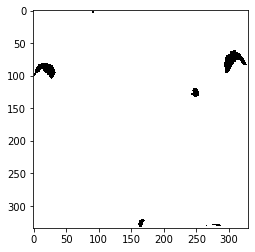

In [126]:
img,crop = crop("test_new/test-yase.jpg")
crop = cv2.cvtColor(crop,cv2.COLOR_RGB2BGR)
plt.imshow(crop)
#crop("test_new/test-yase.jpg")

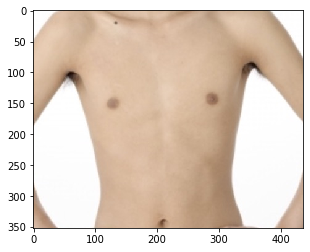

In [142]:
img = cv2.imread("test_new/test-yase.jpg")
h = img.shape[0]
w = img.shape[1]
h_dif = int(img.shape[0]*0.1)
w_dif = int(img.shape[1]*0.1)
h_new = h-h_dif
w_new = w-w_dif
img = img[h_dif:h_new,w_dif:w_new]
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

## データの水増し

In [91]:
import os
import glob
def increase_data(path):
    files = glob.glob(path + "/*.jpg")
    new_dir_path = path + "_increase_data"
    os.mkdir(new_dir_path)
    num = 0
    for f in files:
        num += 1
        data_set = []
        img =cv2.imread(f,1)
        cv2.imwrite(new_dir_path+"/"+"img"+str(num)+".jpg",img)
        original_flip = cv2.flip(img,1)
        cv2.imwrite(new_dir_path+"/"+"original_flip"+str(num)+".jpg",original_flip)
        high_cont_img = cv2.LUT(img, LUT_HC)
        cv2.imwrite(new_dir_path+"/"+"high_cont_img"+str(num)+".jpg",high_cont_img)
        high_cont_img_flip = cv2.LUT(high_cont_img,LUT_HC)
        cv2.imwrite(new_dir_path+"/"+"high_cont_img_flip"+str(num)+".jpg",high_cont_img_flip)
        low_cont_img = cv2.LUT(img, LUT_LC)
        cv2.imwrite(new_dir_path+"/"+"low_cont_img"+str(num)+".jpg",low_cont_img)
        low_cont_img_flip = cv2.LUT(low_cont_img,LUT_LC)
        cv2.imwrite(new_dir_path+"/"+"low_cont_img_flip"+str(num)+".jpg",low_cont_img_flip)
        

In [97]:
increase_data("./image_new/fat_ver1")
increase_data("./image_new/normal_ver1")
increase_data("./image_new/muscle_ver1")
increase_data("./image_new/yase_ver1")

In [98]:
!python read_image_new.py

保存しました:image/photos_new1.npz 882


## モデルの学習

In [32]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 4

# 写真データを読み込み --- (*2)
photos = np.load('image/photos_new.npz')#allow_pickle=True
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7,shuffle=True)

#学習用データを水増しする
x_new = []
y_new = []
for i,xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30,30,5):
        #回転させる
        center = (16,16) #回転の中心点
        mtx = cv2.getRotationMatrix2D(center,ang,1.0)
        xi2 = cv2.warpAffine(xi,mtx,(32,32))
        x_new.append(xi2)
        y_new.append(yi)
        #さらに左右反転させる
        xi3 = cv2.flip(xi2,1)
        x_new.append(xi3)
        y_new.append(yi)

ModuleNotFoundError: No module named 'cnn_model'

In [105]:
!mkdir weight_model

Train on 617 samples, validate on 265 samples
Epoch 1/10
617/617 [==============================] - 6s 10ms/step - loss: 1.7678 - accuracy: 0.2674 - val_loss: 1.3598 - val_accuracy: 0.4717
Epoch 2/10
617/617 [==============================] - 6s 10ms/step - loss: 1.4191 - accuracy: 0.3776 - val_loss: 1.2966 - val_accuracy: 0.4604
Epoch 3/10
617/617 [==============================] - 6s 10ms/step - loss: 1.2660 - accuracy: 0.4425 - val_loss: 3.2128 - val_accuracy: 0.2906
Epoch 4/10
617/617 [==============================] - 6s 10ms/step - loss: 1.3451 - accuracy: 0.4700 - val_loss: 1.1498 - val_accuracy: 0.6302
Epoch 5/10
617/617 [==============================] - 6s 10ms/step - loss: 1.1013 - accuracy: 0.5608 - val_loss: 0.8111 - val_accuracy: 0.6981
Epoch 6/10
617/617 [==============================] - 6s 10ms/step - loss: 1.2943 - accuracy: 0.5754 - val_loss: 0.8846 - val_accuracy: 0.6264
Epoch 7/10
617/617 [==============================] - 6s 10ms/step - loss: 0.8790 - accuracy: 0.

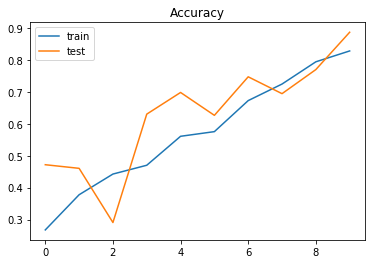

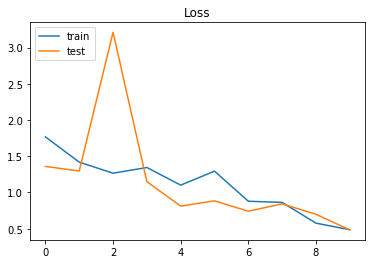

In [106]:
import cnn_model_new
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力を指定 --- (*1)
im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 4

# 写真データを読み込み --- (*2)
photos = np.load('image/photos_new1.npz')#allow_pickle=True
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7,shuffle=True)
'''
#学習用データを水増しする
x_new = []
y_new = []
for i,xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30,30,5):
        #回転させる
        center = (16,16) #回転の中心点
        mtx = cv2.getRotationMatrix2D(center,ang,1.0)
        xi2 = cv2.warpAffine(xi,mtx,(32,32))
        x_new.append(xi2)
        y_new.append(yi)
        #さらに左右反転させる
        xi3 = cv2.flip(xi2,1)
        x_new.append(xi3)
        y_new.append(yi)


#水増しさせたデータを学習用に置き換える
print('水増し前:',len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後:',len(y_train))
'''   

# CNNモデルを取得 --- (*6)
model = cnn_model_new.get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./weight_model/photos-newmodel-light.hdf5')

## モデルの制度の確認

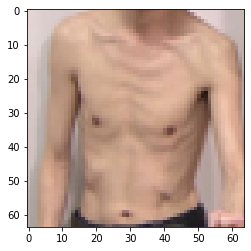

[0.3626979  0.1870474  0.26102117 0.18923357]
この写真は、 筋肉型 です。
可能性は、 36 %
この体の点数は: 63.746318966150284


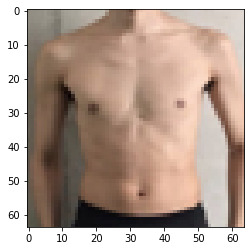

[0.24461325 0.35928807 0.04555474 0.35054395]
この写真は、 標準型 です。
可能性は、 35 %
この体の点数は: 63.009304106235504


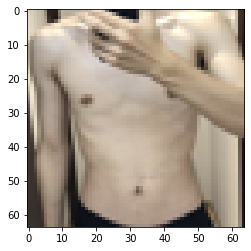

[0.0108187  0.60121506 0.20384365 0.18412262]
この写真は、 標準型 です。
可能性は、 60 %
この体の点数は: 58.577388217672706


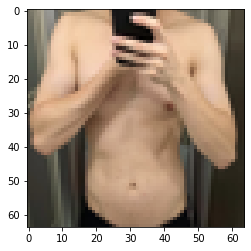

[0.02575424 0.8237091  0.14406525 0.00647149]
この写真は、 標準型 です。
可能性は、 82 %
この体の点数は: 65.99898593500257


In [116]:
import cnn_model_new
import keras 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

target_image = "tast-yase.jpg"

im_rows = 64
im_cols = 64
im_color = 3
in_shape = (im_rows,im_cols,im_color)

LABELS = ["筋肉型","標準型","痩せ型","肥満型"]

#保存した CNNモデルを読み込む
model = cnn_model_new.get_model(in_shape,nb_classes)
model.load_weights("./weight_model/photos-newmodel-light.hdf5")

def check_photo(path):
    #画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB")
    img = img.resize((im_cols,im_rows))
    plt.imshow(img)
    plt.show()
    #データに変換
    x = np.asarray(img)
    x = x.reshape(-1,im_rows,im_cols,im_color)
    x = x / 255
    
    #予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx]*100)
    return (pre,idx,per,)

def check_photo_str(path):
    pre,idx,per = check_photo(path)
    #答えを表示
    print(pre)
    print("この写真は、",LABELS[idx],"です。")
    print("可能性は、",per,"%")
    print("この体の点数は:",90*pre[0]+70*pre[1]+40*pre[2]+40*pre[3])
    
if __name__ == "__main__":
    check_photo_str("test_new/test-yase2.jpg")
    check_photo_str("test_new/test-yase3.jpg")
    check_photo_str("test_new/test-yase5.jpg")
    check_photo_str("test_new/test.jpg")